# Amazon user Based Recommendation Model

### By Ifalore Simeon 

`DESCRIPTION`

The dataset provided contains movie reviews given by Amazon customers. Reviews were given between May 1996 and July 2014.

Data Dictionary
UserID – 4848 customers who provided a rating for each movie
Movie 1 to Movie 206 – 206 movies for which ratings are provided by 4848 distinct users

Data Considerations
- All the users have not watched all the movies and therefore, all movies are not rated. These missing values are represented by NA.
- Ratings are on a scale of -1 to 10 where -1 is the least rating and 10 is the best.

Analysis Task
- Exploratory Data Analysis:

Which movies have maximum views/ratings?
What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
Define the top 5 movies with the least audience.
- Recommendation Model: Some of the movies hadn’t been watched and therefore, are not rated by the users. Netflix would like to take this as an opportunity and build a machine learning recommendation algorithm which provides the ratings for each of the users.

Divide the data into training and test data
Build a recommendation model on training data
Make predictions on the test data

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amz = pd.read_csv("C:/Users/Simeon/Desktop/Amazon movies dataset.csv")

# Exploratory Data Analysis

In [3]:
amz.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking the shape of the data sets
amz.shape

(4848, 207)

In [5]:
amz.describe().T

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


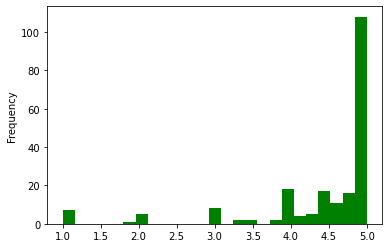

In [6]:
#ploting the mean frequency
amz.describe().T['mean'].plot(bins=25, kind='hist', color = 'green');

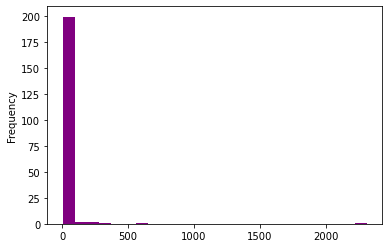

In [7]:
#ploting the count frequency
amz.describe().T['count'].plot(bins=25, kind='hist', color = 'purple');

In [8]:
# Movie that has maxmium view
amz.describe().T['count'].sort_values(ascending=False)[:1].to_frame()

,count
Movie127,2313.0


In [9]:
# Movie that has maxmium ratings
amz.drop('user_id',axis=1).sum().sort_values(ascending=False)[:1].to_frame()

,0
Movie127,9511.0


In [10]:
# Average rating of each movie
amz.drop('user_id',axis=1).mean()

Movie1      5.000000
Movie2      5.000000
Movie3      2.000000
Movie4      5.000000
Movie5      4.103448
              ...   
Movie202    4.333333
Movie203    3.000000
Movie204    4.375000
Movie205    4.628571
Movie206    4.923077
Length: 206, dtype: float64

In [11]:
#top 5 movies with the maximum rating
amz.drop('user_id',axis=1).mean().sort_values(ascending=False)[0:5].to_frame()

,0
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0


In [12]:
# Top 5 movies with least audience
amz.describe().T['count'].sort_values(ascending=True)[:5].to_frame()

,count
Movie1,1.0
Movie71,1.0
Movie145,1.0
Movie69,1.0
Movie68,1.0


# User based Model building

In [13]:

#importing libiraies for model building
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import train_test_split

In [14]:
movie_data = amz.melt(id_vars = amz.columns[0],value_vars=amz.columns[1:],var_name="Movies",value_name="Rating")
movie_data

,user_id,Movies,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [15]:
#creating a dataset for training and testing
rd = Reader(rating_scale=(-1,10))
data = Dataset.load_from_df(movie_data.fillna(0),reader=rd)
data

In [16]:
train_data,test_data = train_test_split(data,test_size=0.20)

In [17]:
#Using SVD (Singular Value Descomposition)
svd = SVD()

In [18]:
svd.fit(train_data)

In [19]:
pred = svd.test(test_data)

In [20]:
accuracy.rmse(pred)

RMSE: 0.2757


0.2756661256276847

In [21]:
accuracy.mae(pred)

MAE:  0.0409


0.04094988248375935

In [22]:
u_id='AH3QC2PC1VTGP'
mv = 'Movie206'
r_id = 5.0
svd.predict(u_id, mv, r_ui=r_id, verbose= True)

user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 0.04   {'was_impossible': False}


Prediction(uid='AH3QC2PC1VTGP', iid='Movie206', r_ui=5.0, est=0.037522696094773544, details={'was_impossible': False})

In [23]:
from surprise.model_selection import cross_validate

In [24]:
cross_validate(svd, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.2790  0.2831  0.2855  0.2826  0.0027  
MAE (testset)     0.0429  0.0429  0.0427  0.0428  0.0001  
Fit time          69.14   60.81   74.83   68.26   5.76    
Test time         4.99    4.19    8.04    5.74    1.66    


{'test_rmse': array([0.27903865, 0.28312894, 0.28553412]),
 'test_mae': array([0.04288795, 0.04287469, 0.04269187]),
 'fit_time': (69.14156985282898, 60.80686831474304, 74.82693457603455),
 'test_time': (4.986289978027344, 4.192029714584351, 8.03850531578064)}

In [25]:
def repeat(ml_type,dframe,min_,max_):
    rd = Reader()
    data = Dataset.load_from_df(dframe,reader=rd)
    print(cross_validate(ml_type, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True))
    print("#"*10)
    u_id = 'AH3QC2PC1VTGP'
    m_id = 'Movie206'
    ra_u = 5.0
    print(ml_type.predict(u_id,mv,r_ui=ra_u,verbose=True))
    print("#"*10)
    print()

In [26]:
amz= amz.iloc[:3000, :50]
movie_data = amz.melt(id_vars = amz.columns[0],value_vars=amz.columns[1:],var_name="Movies",value_name="Rating")

In [27]:
repeat(SVD(),movie_data.fillna(0),-1,10)
repeat(SVD(),movie_data.fillna(movie_data.mean()),-1,10)
repeat(SVD(),movie_data.fillna(movie_data.median()),-1,10)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0271  1.0310  1.0289  1.0290  0.0016  
MAE (testset)     1.0116  1.0131  1.0123  1.0123  0.0006  
Fit time          11.43   14.13   15.07   13.54   1.54    
Test time         0.60    0.69    0.90    0.73    0.12    
{'test_rmse': array([1.02705457, 1.03104907, 1.02894154]), 'test_mae': array([1.01163967, 1.01310641, 1.01227078]), 'fit_time': (11.43297553062439, 14.131345510482788, 15.068916320800781), 'test_time': (0.6032133102416992, 0.6864235401153564, 0.8986828327178955)}
##########
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 1.00   {'was_impossible': False}
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 1.00   {'was_impossible': False}
##########



C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_18212/127061997.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  repeat(SVD(),movie_data.fillna(movie_data.mean()),-1,10)


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0510  0.0649  0.0543  0.0567  0.0059  
MAE (testset)     0.0076  0.0075  0.0072  0.0074  0.0002  
Fit time          8.05    9.37    7.84    8.42    0.68    
Test time         1.08    0.45    0.82    0.78    0.26    
{'test_rmse': array([0.05096145, 0.06486785, 0.0543207 ]), 'test_mae': array([0.00759636, 0.0074677 , 0.00715425]), 'fit_time': (8.04529333114624, 9.369925260543823, 7.844586133956909), 'test_time': (1.080878496170044, 0.4459848403930664, 0.8164474964141846)}
##########
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 4.53   {'was_impossible': False}
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 4.53   {'was_impossible': False}
##########



C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_18212/127061997.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  repeat(SVD(),movie_data.fillna(movie_data.median()),-1,10)


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0555  0.0687  0.0626  0.0623  0.0054  
MAE (testset)     0.0053  0.0051  0.0051  0.0052  0.0001  
Fit time          8.25    9.16    7.77    8.39    0.58    
Test time         0.47    0.81    0.44    0.57    0.17    
{'test_rmse': array([0.05546185, 0.06872768, 0.06259858]), 'test_mae': array([0.00525613, 0.00513913, 0.00508715]), 'fit_time': (8.248005390167236, 9.164777278900146, 7.766745090484619), 'test_time': (0.4727299213409424, 0.8124592304229736, 0.43959951400756836)}
##########
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 4.92   {'was_impossible': False}
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 4.92   {'was_impossible': False}
##########



In [28]:
#trying grid search and find optimum hyperparameter value for n_factors
from surprise.model_selection import GridSearchCV

In [29]:
param_grid = {'n_epochs':[20,30],
             'lr_all':[0.005,0.001],
             'n_factors':[50,100]}

In [30]:
gs = GridSearchCV(SVD,param_grid,measures=['rmse','mae'],cv=3)
gs.fit(data)

In [31]:
gs.best_score

{'rmse': 0.28011413685252345, 'mae': 0.04127550428050707}

In [32]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.28011413685252345
{'n_epochs': 30, 'lr_all': 0.005, 'n_factors': 50}
